In [1]:
import pickle
from pylab import *
import matplotlib.image as mpimg
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import h5py
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

In [2]:
#go through a bunch of data and load it
prefixdir = '/data/chocula/villaa/PhotoN_SuperSim/ZipSum'
data = {}
data['z14'] = {}
data['z14']['ybe'] = {}
data['z14']['ybe']['typelabel'] = 'Y/Be'
data['z14']['ybe']['CDMSliteV'] = 70.0
data['z14']['ybe']['bigfile'] = 'ybe_z14_180223_0x0004_1-3B.pkl'
data['z14']['ybe']['smallfile'] = 'ybe_z14_180223_0x0004_100M.pkl'
data['z14']['sbbe'] = {}
data['z14']['sbbe']['typelabel'] = 'Sb/Be'
data['z14']['sbbe']['CDMSliteV'] = 70.0
data['z14']['sbbe']['bigfile'] = 'sbbe_z14_180302_0x0004_1-3B.pkl'
data['z14']['sbbe']['smallfile'] = 'sbbe_z14_180302_0x0004_100M.pkl'
data['z4'] = {}
data['z4']['ybe'] = {}
data['z4']['ybe']['typelabel'] = 'Y/Be'
data['z4']['ybe']['CDMSliteV'] = 25.0
data['z4']['ybe']['bigfile'] = 'ybe_z4_180223_0x0004_1-3B.pkl'
data['z4']['ybe']['smallfile'] = 'ybe_z4_180223_0x0004_100M.pkl'
data['z4']['sbbe'] = {}
data['z4']['sbbe']['typelabel'] = 'Sb/Be'
data['z4']['sbbe']['CDMSliteV'] = 25.0
data['z4']['sbbe']['bigfile'] = 'sbbe_z4_180302_0x0004_1-3B.pkl'
data['z4']['sbbe']['smallfile'] = 'sbbe_z4_180302_0x0004_100M.pkl'
data['z5'] = {}
data['z5']['ybe'] = {}
data['z5']['ybe']['typelabel'] = 'Y/Be'
data['z5']['ybe']['CDMSliteV'] = 0.0
data['z5']['ybe']['bigfile'] = 'ybe_z5_180305_0x0004_1-3B.pkl'
data['z5']['ybe']['smallfile'] = 'ybe_z5_180305_0x0004_100M.pkl'
data['z5']['sbbe'] = {}
data['z5']['sbbe']['typelabel'] = 'Sb/Be'
data['z5']['sbbe']['CDMSliteV'] = 0.0
data['z5']['sbbe']['bigfile'] = 'sbbe_z5_180305_0x0004_1-3B.pkl'
data['z5']['sbbe']['smallfile'] = 'sbbe_z5_180305_0x0004_100M.pkl'
data['z14']['ybe']['capfile-Ge'] = 'ybe_z14_180307_cap_slow.pkl' 
cfile = prefixdir + '/' + data['z14']['ybe']['capfile-Ge']
with open(cfile,'rb') as readFile:
    data['z14']['ybe']['capdata-Ge']=pickle.load(readFile,encoding='latin1')


for det in data:
    print('reading file for detector {}'.format(det))

    for set in data[det]:
      file = prefixdir + '/' + data[det][set]['smallfile']
      file2 = prefixdir + '/' + data[det][set]['bigfile']
      print(file)
      print(file2)
      with open(file,'rb') as readFile:
            data[det][set]['smalldata']=pickle.load(readFile,encoding='latin1')
      with open(file2,'rb') as readFile:
            data[det][set]['bigdata']=pickle.load(readFile,encoding='latin1')
            
#add the flux data
for set in data['z14']:
    data['z14'][set]['fluxfile'] = '/data/chocula/villaa/PhotoN_SuperSim/ZipSum/flux_data_'+set+'_z14_0x000a_v1.pkl'
    file = data['z14'][set]['fluxfile']
    with open(file,'rb') as readFile:
            data['z14'][set]['fluxdata']=pickle.load(readFile,encoding='latin1')
 
#set some names
data['z14']['detname'] = 'IT5Z2'
data['z4']['detname'] = 'IT2Z1'
data['z5']['detname'] = 'IT2Z2'

#add trigger thresholds
data['z14']['ybe']['CDMSlite'] = {}
data['z14']['ybe']['CDMSlite']['thresh']=350.
data['z14']['ybe']['CDMSlite']['sigthr']=20. # sigma on threshold
data['z14']['ybe']['CDMSlite']['thresh_t']=1800.
data['z14']['ybe']['CDMSlite']['sigthr_t']=100. # sigma on threshold
data['z14']['sbbe']['CDMSlite'] = {}
data['z14']['sbbe']['CDMSlite']['thresh']=350.
data['z14']['sbbe']['CDMSlite']['sigthr']=20. # sigma on threshold
data['z14']['sbbe']['CDMSlite']['thresh_t']=1800.
data['z14']['sbbe']['CDMSlite']['sigthr_t']=100. # sigma on threshold
data['z4']['ybe']['CDMSlite'] = {}
data['z4']['ybe']['CDMSlite']['thresh']=890.
data['z4']['ybe']['CDMSlite']['sigthr']=40. # sigma on threshold
data['z4']['ybe']['CDMSlite']['thresh_t']=2200.
data['z4']['ybe']['CDMSlite']['sigthr_t']=100. # sigma on threshold
data['z4']['sbbe']['CDMSlite'] = {}
data['z4']['sbbe']['CDMSlite']['thresh']=890.
data['z4']['sbbe']['CDMSlite']['sigthr']=40. # sigma on threshold
data['z4']['sbbe']['CDMSlite']['thresh_t']=2200.
data['z4']['sbbe']['CDMSlite']['sigthr_t']=100. # sigma on threshold


reading file for detector z14
/data/chocula/villaa/PhotoN_SuperSim/ZipSum/ybe_z14_180223_0x0004_100M.pkl
/data/chocula/villaa/PhotoN_SuperSim/ZipSum/ybe_z14_180223_0x0004_1-3B.pkl
/data/chocula/villaa/PhotoN_SuperSim/ZipSum/sbbe_z14_180302_0x0004_100M.pkl
/data/chocula/villaa/PhotoN_SuperSim/ZipSum/sbbe_z14_180302_0x0004_1-3B.pkl
reading file for detector z4
/data/chocula/villaa/PhotoN_SuperSim/ZipSum/ybe_z4_180223_0x0004_100M.pkl
/data/chocula/villaa/PhotoN_SuperSim/ZipSum/ybe_z4_180223_0x0004_1-3B.pkl
/data/chocula/villaa/PhotoN_SuperSim/ZipSum/sbbe_z4_180302_0x0004_100M.pkl
/data/chocula/villaa/PhotoN_SuperSim/ZipSum/sbbe_z4_180302_0x0004_1-3B.pkl
reading file for detector z5
/data/chocula/villaa/PhotoN_SuperSim/ZipSum/ybe_z5_180305_0x0004_100M.pkl
/data/chocula/villaa/PhotoN_SuperSim/ZipSum/ybe_z5_180305_0x0004_1-3B.pkl
/data/chocula/villaa/PhotoN_SuperSim/ZipSum/sbbe_z5_180305_0x0004_100M.pkl
/data/chocula/villaa/PhotoN_SuperSim/ZipSum/sbbe_z5_180305_0x0004_1-3B.pkl


In [3]:
#trying to customize here, see:
#https://matplotlib.org/users/customizing.html
#matplotlib.rc('figure', figsize=(3.4, 3.4*(4/6)))
mpl.rcParams['lines.linewidth'] = 2

#ticks
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.labelsize'] = 22

mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = False
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 22


#error bars
#mpl.rcParams['errorbar.capsize'] = 3

#axis stuff
mpl.rcParams['axes.labelsize'] = 22

#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])

In [4]:
#might as well make some 1d histograms of energy stuff

emax = 1000
res = 10 # 10 eV resolution

#=================change this stuff to get plots for different detectors=============
zip='z14'
set='ybe'
type='bigdata'
#===================================================================================

capdata = data[zip][set][type]
edepNR = np.sum(capdata['NRedep'],1)
edepNR = edepNR + np.random.normal(0,res,np.shape(edepNR)[0])

n,nx = np.histogram(edepNR[(capdata['ERhit']==0) & (capdata['NRhit']>0)],100,range=(0,emax))
nerr = np.sqrt(n)
xc = (nx[:-1] + nx[1:]) / 2

n_cap,nx_cap = np.histogram(edepNR[(capdata['ERhit']==0) & (capdata['NRhit']>0) & (capdata['ncap']>0)],100,range=(0,emax))
nerr_cap = np.sqrt(n_cap)
xc_cap = (nx_cap[:-1] + nx_cap[1:]) / 2



In [5]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#lay out the colors
rgb_r = (255/255.0,0/255.0,0/255.0)
rgb_b = (0/255.0,0/255.0,255/255.0)
rgb_o = (255/255.0,127/255.0,0/255.0)
rgb_b = (31/255.0,120/255.0,180/255.0)
rgb_lr = (251/255.0,154/255.0,153/255.0)
rgb_g = (203/255.0,195/255.0,195/255.0)

#try a normalization; assume exactly 1e5 gammas per neutron and a 1mCi sourcea
norm = 1/np.float(capdata['totalevents']) #per neutron
#print(norm)
width = xc[1]-xc[0] #width in eV
#print(width)
norm = norm/width #per neutron per eV
#print(norm)
srcrate = 3.7e7/1.0e5 #n per second
srcrate = srcrate*(24*60*60) #n per day
norm = norm*srcrate
#print(norm)

#ax1.errorbar(xc, n, yerr=nerr,marker='o', markersize=8, linestyle='none',color='k', label='data')
nrlabel='all NRs ({})'.format(data[zip][set]['typelabel'])
ax1.step(xc,n*norm, where='mid',color=rgb_r, linestyle='-', label=nrlabel, linewidth=2)
ax1.step(xc_cap,n_cap*norm, where='mid',color=rgb_b, linestyle='-', label='captures', linewidth=2)

ymin = 1e-1*norm
ymax = 1e5*norm

thresh = data[zip][set]['CDMSlite']['thresh']
sigthr = data[zip][set]['CDMSlite']['sigthr']
a = [thresh,thresh] #this was the threshold for IT5Z2 :
#http://titus.stanford.edu/cdms_restricted/Soudan/R133/ebook/171012_AS/T5Z2liteTrigEff.html
b = [ymin,ymax]
#ax1.plot(a,b,linestyle='--',color='k',label='_nolegend_')
#ax1.plot(a,b,linestyle='--',color='k',label='Thresh. (IT5Z2) in keV$_{\mathrm{nr}}$')

tlabel = 'Thresh. {0}, eV$_{{\mathrm{{nr}}}}$'.format(data[zip]['detname'])
ax1.axvline(thresh, color='k', linestyle='--', lw=2, alpha=0.8,label=tlabel)
erange_x = np.arange(thresh-sigthr, thresh+sigthr, 0.01)
ax1.fill_between(erange_x, ymin, ymax, facecolor=rgb_o, alpha=0.3)

ax1.set_yscale('log')
ax1.set_xlim(0, emax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('NR energy [eV]',**axis_font)
ax1.set_ylabel('rate [(eV $\cdot$ day)$^{-1}$]',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
#ax1.legend([gh,gl,nh,nl], ['gamma (high gain)','gamma (low gain)','neutron (high gain)', 'neutron (low gain)'],loc=1)
#ax1.legend(loc=1, bbox_to_anchor=(0.82, 1),
#         fancybox=True, shadow=True, ncol=4)
ax1.legend(loc=1,prop={'size':22})

In [6]:
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

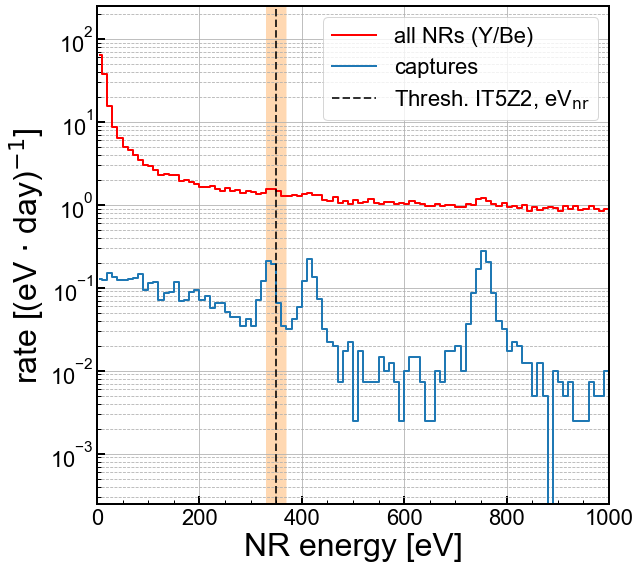

In [7]:
plt.tight_layout()
plt.savefig('figures/{0}_{1}_G4captures_{2}_{3}.png'.format(zip,set,type,'CDMSlite'))
plt.show()

In [8]:
#take the number of total captures (with or without ER)
oneper = np.ones(np.shape(capdata['ncap']))
Ncap = np.sum(oneper[capdata['ncap']>0])
print(Ncap)

cap=data['z14']['ybe']['capdata-Ge'] #capture info is generic to any Ge detector
#go ahead and pick out this many events from the capture file
idx = np.arange(np.shape(cap['NRedep'])[0])
idx_rand = np.random.choice(idx,np.int(Ncap),replace=False)
edepNR_cap = np.sum(cap['NRedep'],1)
edepNR_cap = edepNR_cap + np.random.normal(0,res,np.shape(edepNR_cap)[0])
edepNR_cap[~cap['cEscape']] = 1e9 #set any non-escaper as a GeV event
#print(np.sum(np.ones(np.shape(cap['cEscape']))[cap['cEscape']]))
edepNR_cap_reduced = edepNR_cap[idx_rand]
#edepNR_cap_reduced = edepNR_cap
#print(np.shape(edepNR_cap_reduced))
#print(edepNR_cap_reduced)
#print(np.sum(np.ones(np.shape(cap['NRedep'])[0])[cap['cEscape']]))

#make the new capture histogram
n_cap_new,nx_cap_new = np.histogram(edepNR_cap_reduced,100,range=(0,emax))
#print(np.sum(n))
#print(np.sum(n_cap_new))

15014.0


In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#lay out the colors
rgb_r = (255/255.0,0/255.0,0/255.0)
rgb_b = (0/255.0,0/255.0,255/255.0)
rgb_o = (255/255.0,127/255.0,0/255.0)
rgb_b = (31/255.0,120/255.0,180/255.0)
rgb_lr = (251/255.0,154/255.0,153/255.0)
rgb_g = (203/255.0,195/255.0,195/255.0)

#try a normalization; assume exactly 1e5 gammas per neutron and a 1mCi sourcea
norm = 1/np.float(capdata['totalevents']) #per neutron
#print(norm)
width = xc[1]-xc[0] #width in eV
#print(width)
norm = norm/width #per neutron per eV
#print(norm)
srcrate = 3.7e7/1.0e5 #n per second
srcrate = srcrate*(24*60*60) #n per day
norm = norm*srcrate
print(norm)
daysinexposure = np.float(capdata['totalevents'])/srcrate
print(daysinexposure)
print(np.sum(n_cap_new*norm*width)*daysinexposure)
print(n_cap_new[70])
print(n_cap_new[70]*norm)

#ax1.errorbar(xc, n, yerr=nerr,marker='o', markersize=8, linestyle='none',color='k', label='data')
ax1.step(xc,(n-n_cap+n_cap_new)*norm, where='mid',color=rgb_r, linestyle='-', label=nrlabel, linewidth=2)
ax1.step(xc_cap,n_cap_new*norm, where='mid',color=rgb_b, linestyle='-', label='re-sim captures', linewidth=2)

ymin = 1e-1*norm
ymax = 1e5*norm


a = [thresh,thresh] #this was the threshold for IT5Z2 :
#http://titus.stanford.edu/cdms_restricted/Soudan/R133/ebook/171012_AS/T5Z2liteTrigEff.html
b = [ymin,ymax]
#ax1.plot(a,b,linestyle='--',color='k',label='_nolegend_')
#ax1.plot(a,b,linestyle='--',color='k',label='Thresh. (IT5Z2) in keV$_{\mathrm{nr}}$')

tlabel = 'Thresh. {0}, eV$_{{\mathrm{{nr}}}}$'.format(data[zip]['detname'])
ax1.axvline(thresh, color='k', linestyle='--', lw=2, alpha=0.8,label=tlabel)
erange_x = np.arange(thresh-sigthr, thresh+sigthr, 0.01)
ax1.fill_between(erange_x, ymin, ymax, facecolor=rgb_o, alpha=0.3)

ax1.set_yscale('log')
ax1.set_xlim(0, emax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('NR energy [eV]',**axis_font)
ax1.set_ylabel('rate [(eV $\cdot$ day)$^{-1}$]',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
#ax1.legend([gh,gl,nh,nl], ['gamma (high gain)','gamma (low gain)','neutron (high gain)', 'neutron (low gain)'],loc=1)
#ax1.legend(loc=1, bbox_to_anchor=(0.82, 1),
#         fancybox=True, shadow=True, ncol=4)
ax1.legend(loc=1,prop={'size':22})

0.00245341331281
40.759540790790794
10415.0
3
0.00736023993842


In [10]:
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

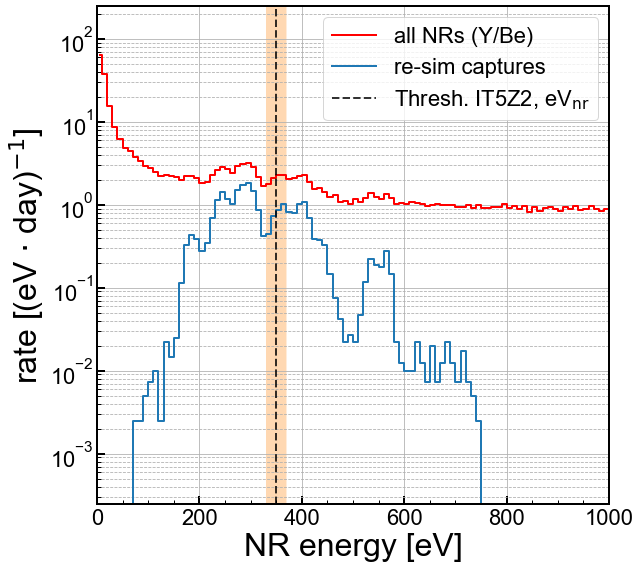

In [11]:
plt.tight_layout()
#plt.savefig('figures/IT5Z2_RealSimcaptures_100M.eps')
plt.savefig('figures/{0}_{1}_Realcaptures_{2}_{3}.png'.format(zip,set,type,'CDMSlite'))
plt.show()

In [12]:
#do some yield calculations
import lindhard as lind
#import numpy as np

y = lind.getLindhardGe(False)

yv = np.vectorize(y)

#voltage and average energy per pair
V=data[zip][set]['CDMSliteV'] #should be derived from input structure
egam = 3.3 #eV per pair
#e = np.array([200,400,600,800],dtype=float)
#print(yv(e))
#edepNR_cap_reduced
#edepNR
#edepNR = np.sum(capdata['NRedep'],1)
#apply lindhard to all recoils
NRedep_ee = capdata['NRedep']*yv(capdata['NRedep'])
print(NRedep_ee[0])
print(capdata['NRedep'][0])
NRedep_t = capdata['NRedep'] + (V/egam)*NRedep_ee
edepNR_t = np.sum(NRedep_t,1)
edepNR_ee = edepNR_t/(1+(V/egam)) #electron-equivalent scale for application of res

#edepNR_cap = np.sum(cap['NRedep'],1)
#edepNR_cap = edepNR_cap + np.random.normal(0,res,np.shape(edepNR_cap)[0])
#edepNR_cap[~cap['cEscape']] = 1e9 #set any non-escaper as a GeV event
#edepNR_cap_reduced = edepNR_cap[idx_rand]
NRedep_cap_ee = cap['NRedep']*yv(cap['NRedep'])
print(NRedep_cap_ee[0])
print(cap['NRedep'][0])
NRedep_cap_t = cap['NRedep'] + (V/egam)*NRedep_cap_ee
edepNR_cap_t = np.sum(NRedep_cap_t,1)
edepNR_cap_ee = edepNR_cap_t/(1+(V/egam))

[ 28.34857863  33.11330377   2.91895251   0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.        ]
[ 202.72575784  232.5220994    27.31462882    0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.        ]
[ 31.88968333   3.15229878   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.           0.        ]
[ 224.92092481   29.22877224    0.            0.            0.            0.
    0.            0.            0.            0.            0.            0.
    0.        ]


In [13]:
#add in the resolution from a model
import pnRes as pnr

r = pnr.getRes(zip) #select the default mode for the resolution model by not specifying second param
rv =  np.vectorize(r)

#apply the res
edepNR_ee_res = edepNR_ee + np.random.normal(0,rv(edepNR_ee))
edepNR_t_res = (1+(V/egam))*edepNR_ee_res  #convert back to eVt if desired
print(np.shape(edepNR_t_res))
print(np.shape(capdata['NRedep']))

edepNR_cap_ee_res = edepNR_cap_ee + np.random.normal(0,rv(edepNR_cap_ee))
edepNR_cap_t_res = (1+(V/egam))*edepNR_cap_ee_res  #convert back to eVt if desired
print(np.shape(edepNR_cap_t_res))
print(np.shape(cap['NRedep']))

#reduce the sample to the right number of recoils
edepNR_cap_t_res[~cap['cEscape']] = 1e9 #set any non-escaper as a GeV event
edepNR_cap_t_res_reduced = edepNR_cap_t_res[idx_rand]
print(np.shape(edepNR_cap_t_res_reduced))

(499491,)
(499491, 13)
(20000,)
(20000, 13)
(15014,)


In [14]:
#make the histogram

emax = 20000 #keVt scale
#make the new capture histogram
n_res,nx_res = np.histogram(edepNR_t_res[(capdata['ERhit']==0) & (capdata['NRhit']>0)]/1000.0,100,range=(0,emax/1000.0)) #do it in keV

xc_res = (nx_res[:-1] + nx_res[1:]) / 2

n_cap_res,nx_cap_res = np.histogram(edepNR_cap_t_res_reduced/1000.0,100,range=(0,emax/1000.0)) #do it in keV

xc_cap_res = (nx_cap_res[:-1] + nx_cap_res[1:]) / 2

In [15]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#lay out the colors
rgb_r = (255/255.0,0/255.0,0/255.0)
rgb_b = (0/255.0,0/255.0,255/255.0)
rgb_o = (255/255.0,127/255.0,0/255.0)
rgb_b = (31/255.0,120/255.0,180/255.0)
rgb_lr = (251/255.0,154/255.0,153/255.0)
rgb_g = (203/255.0,195/255.0,195/255.0)

#try a normalization; assume exactly 1e5 gammas per neutron and a 1mCi sourcea
norm = 1/np.float(capdata['totalevents']) #per neutron
#print(norm)
width = xc_res[1]-xc_res[0] #width in keV
#print(width)
norm = norm/width #per neutron per keV
#print(norm)
srcrate = 3.7e7/1.0e5 #n per second
srcrate = srcrate*(24*60*60) #n per day
norm = norm*srcrate
#print(norm)

#ax1.errorbar(xc, n, yerr=nerr,marker='o', markersize=8, linestyle='none',color='k', label='data')
nrlabel='all NRs ({})'.format(data[det][set]['typelabel'])
ax1.step(xc_res,(n_res+n_cap_res)*norm, where='mid',color=rgb_r, linestyle='-', label=nrlabel, linewidth=2)
ax1.step(xc_cap_res,n_cap_res*norm, where='mid',color=rgb_b, linestyle='-', label='captures', linewidth=2)

ymin = 1e-1*norm
ymax = 1e5*norm

thresh_t = data[zip][set]['CDMSlite']['thresh_t']
sigthr_t = data[zip][set]['CDMSlite']['sigthr_t']
thresh_t/=1000.0
sigthr_t/=1000.0
a = [thresh_t,thresh_t] #this was the threshold for IT5Z2 :
#http://titus.stanford.edu/cdms_restricted/Soudan/R133/ebook/171012_AS/T5Z2liteTrigEff.html
b = [ymin,ymax]
#ax1.plot(a,b,linestyle='--',color='k',label='_nolegend_')
#ax1.plot(a,b,linestyle='--',color='k',label='Thresh. (IT5Z2) in keV$_{\mathrm{nr}}$')

tlabel = 'Thresh. {0}, keV$_{{\mathrm{{t}}}}$'.format(data[zip]['detname'])
ax1.axvline(thresh_t, color='k', linestyle='--', lw=2, alpha=0.8,label=tlabel)
erange_x = np.arange(thresh_t-sigthr_t, thresh_t+sigthr_t, 0.01)
ax1.fill_between(erange_x, ymin, ymax, facecolor=rgb_o, alpha=0.3)

ax1.set_yscale('log')
ax1.set_xlim(0, emax/1000.0) #in keV
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('energy [keV$_t$]',**axis_font)
ax1.set_ylabel('rate [(keV $\cdot$ day)$^{-1}$]',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
#ax1.legend([gh,gl,nh,nl], ['gamma (high gain)','gamma (low gain)','neutron (high gain)', 'neutron (low gain)'],loc=1)
#ax1.legend(loc=1, bbox_to_anchor=(0.82, 1),
#         fancybox=True, shadow=True, ncol=4)
ax1.legend(loc=1,prop={'size':22})

In [16]:
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

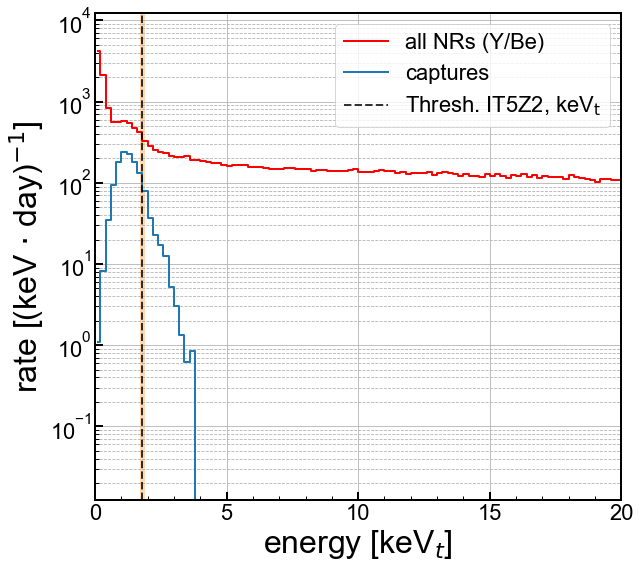

In [17]:
plt.tight_layout()
#plt.savefig('figures/IT5Z2_RealSimcaptures_100M.eps')
plt.savefig('figures/{0}_{1}_GoodRes_keVee_{2}_{3}.png'.format(zip,set,type,'CDMSlite'))
plt.show()